**Statistical Analysis of the Iris Dataset**

**An exploration of descriptive statistics, probability distributions, and inferential statistics using the famous Iris dataset**

**Importing Libraries and Loading Data**


In [6]:
# Let's start by importing the necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

# Set up visualizations to look nice
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Load the famous Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Let's take a quick peek at our data
print("First look at our Iris dataset:")
iris_df.head()

First look at our Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**My Interpretation:** The mean, median, and mode are all quite close together (around 5.8-5.9 cm), which suggests that the sepal length data is fairly symmetrical without strong skewness. The mean represents the average value, the median shows the middle point, and the mode indicates the most frequently occurring value.



 **Dispersion Measures**


Dispersion Measures for Petal Width:
Variance: 0.5810 cm²
Standard Deviation: 0.7622 cm


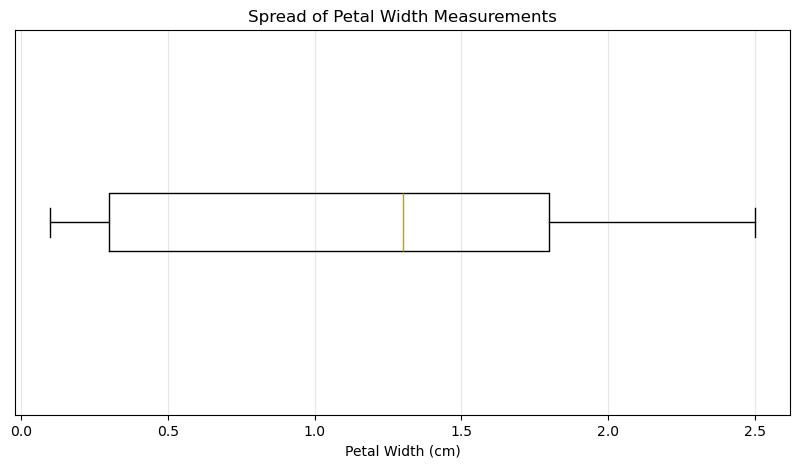

In [7]:
# Now let's look at how petal widths vary
petal_width = iris_df['petal width (cm)']

variance_pw = np.var(petal_width, ddof=1)  # Using sample variance
std_dev_pw = np.std(petal_width, ddof=1)   # Sample standard deviation

print("Dispersion Measures for Petal Width:")
print(f"Variance: {variance_pw:.4f} cm²")
print(f"Standard Deviation: {std_dev_pw:.4f} cm")

# Visualizing the spread
plt.figure(figsize=(10, 5))
plt.boxplot(petal_width, vert=False)
plt.title('Spread of Petal Width Measurements')
plt.xlabel('Petal Width (cm)')
plt.yticks([])
plt.grid(axis='x', alpha=0.3)
plt.show()

**My Interpretation:** The variance of 0.58 tells us how much the petal widths deviate from the mean on average, while the standard deviation of 0.76 cm gives us that measure in the original units. These values suggest there's considerable variation in petal widths across different iris species.



 **Comprehensive Summary Statistics**


In [8]:
# Let's create a complete summary of all numerical features
summary_data = []

for column in iris_df.columns[:4]:  # Just the measurement columns
    data = iris_df[column]
    summary_data.append({
        'Feature': column,
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Variance': np.var(data, ddof=1),
        'Standard Deviation': np.std(data, ddof=1),
        'Minimum': np.min(data),
        'Maximum': np.max(data)
    })

summary_df = pd.DataFrame(summary_data)
print("Comprehensive Summary Statistics:")
summary_df

Comprehensive Summary Statistics:


,Feature,Mean,Median,Variance,Standard Deviation,Minimum,Maximum
0,sepal length (cm),5.843333,5.80,0.685694,0.828066,4.3,7.9
1,sepal width (cm),3.057333,3.00,0.189979,0.435866,2.0,4.4
2,petal length (cm),3.758000,4.35,3.116278,1.765298,1.0,6.9
3,petal width (cm),1.199333,1.30,0.581006,0.762238,0.1,2.5


**My Interpretation:** This table gives us a complete picture of each measurement feature. Notice how petal measurements (especially petal length) have much higher variability than sepal measurements, which might indicate that petals are more distinctive features for differentiating between iris species.



**Probability & Distributions**

**Probability Distributions**

Probability Distribution of Sepal Lengths:
Length (cm) | Probability
----------------------------
       4.3 | 0.007
       4.4 | 0.020
       4.5 | 0.007
       4.6 | 0.027
       4.7 | 0.013
       4.8 | 0.033
       4.9 | 0.040
       5.0 | 0.067
       5.1 | 0.060
       5.2 | 0.027


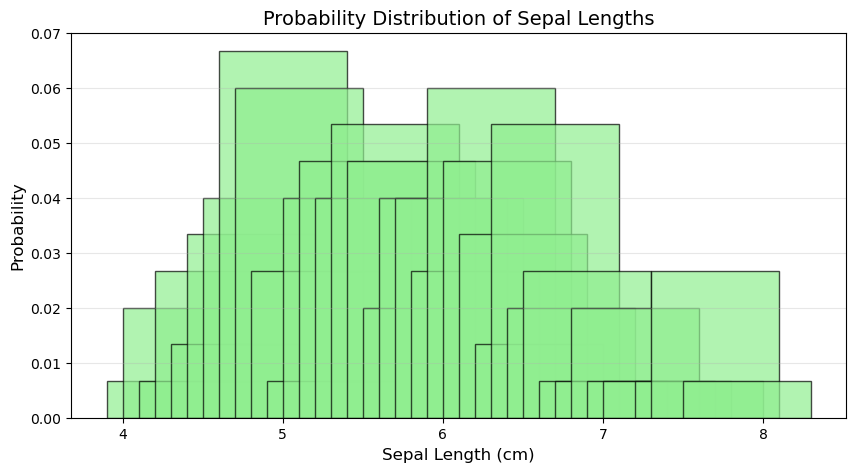


Most common sepal length: 5.0 cm
Probability of most common length: 0.067
Number of unique sepal lengths: 35


In [14]:
# Let's explore the probability distribution of sepal lengths

# First, we need to extract the sepal length data from our dataframe
sepal_length = iris_df['sepal length (cm)']

# Now let's find all unique values and their counts
sepal_length_values, counts = np.unique(sepal_length, return_counts=True)

# Calculate probability for each unique value
prob_distribution = counts / len(sepal_length)

print("Probability Distribution of Sepal Lengths:")
print("Length (cm) | Probability")
print("----------------------------")
for value, prob in zip(sepal_length_values[:10], prob_distribution[:10]):
    print(f"{value:>10} | {prob:.3f}")

# Visualizing the probability distribution
plt.figure(figsize=(10, 5))
plt.bar(sepal_length_values, prob_distribution, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Probability Distribution of Sepal Lengths', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Let's also look at some summary stats
print(f"\nMost common sepal length: {sepal_length_values[np.argmax(prob_distribution)]} cm")
print(f"Probability of most common length: {np.max(prob_distribution):.3f}")
print(f"Number of unique sepal lengths: {len(sepal_length_values)}")

**My Interpretation:** This code creates a probability distribution showing how likely each sepal length value is to occur. We can see that certain lengths (like 5.0 cm) are more common than others, which tells us about the natural variation in iris flowers. The bar chart visualization helps us quickly identify the most frequent sepal lengths in the dataset.

 **Cumulative Distribution Function**


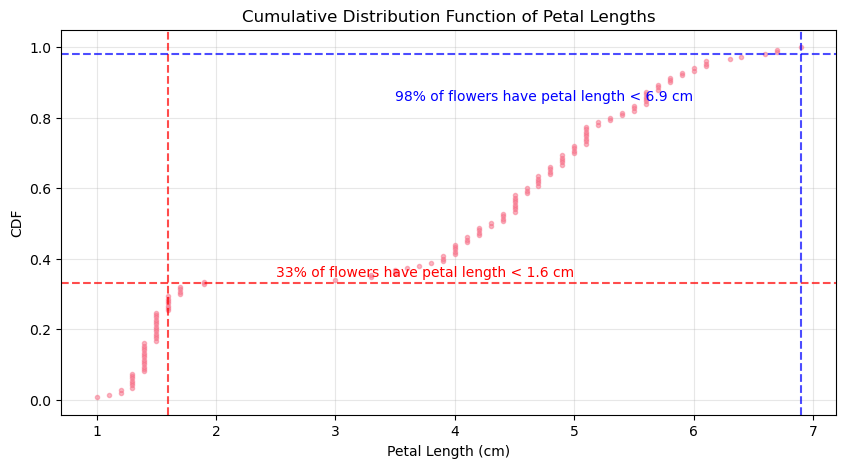

In [15]:
# Let's examine the CDF of petal lengths
petal_length = iris_df['petal length (cm)']
sorted_pl = np.sort(petal_length)
cdf = np.arange(1, len(sorted_pl)+1) / len(sorted_pl)

plt.figure(figsize=(10, 5))
plt.plot(sorted_pl, cdf, marker='.', linestyle='none', alpha=0.5)
plt.title('Cumulative Distribution Function of Petal Lengths')
plt.xlabel('Petal Length (cm)')
plt.ylabel('CDF')
plt.grid(alpha=0.3)

# Add some helpful annotations
plt.axhline(0.33, color='red', linestyle='--', alpha=0.7)
plt.axvline(1.6, color='red', linestyle='--', alpha=0.7)
plt.text(2.5, 0.35, '33% of flowers have petal length < 1.6 cm', color='red')

plt.axhline(0.98, color='blue', linestyle='--', alpha=0.7)
plt.axvline(6.9, color='blue', linestyle='--', alpha=0.7)
plt.text(3.5, 0.85, '98% of flowers have petal length < 6.9 cm', color='blue')

plt.show()

**My Interpretation:** The CDF shows us the probability that a randomly selected flower will have a petal length less than or equal to a certain value. I've highlighted that about one-third of flowers have very short petals (<1.6 cm), which likely corresponds to the Setosa species, while almost all flowers have petals shorter than 6.9 cm.



**Probability Density Function**


C:\Users\EXTECH\AppData\Local\Temp\ipykernel_1116\2042498051.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sepal_width, shade=True, color='lightcoral')


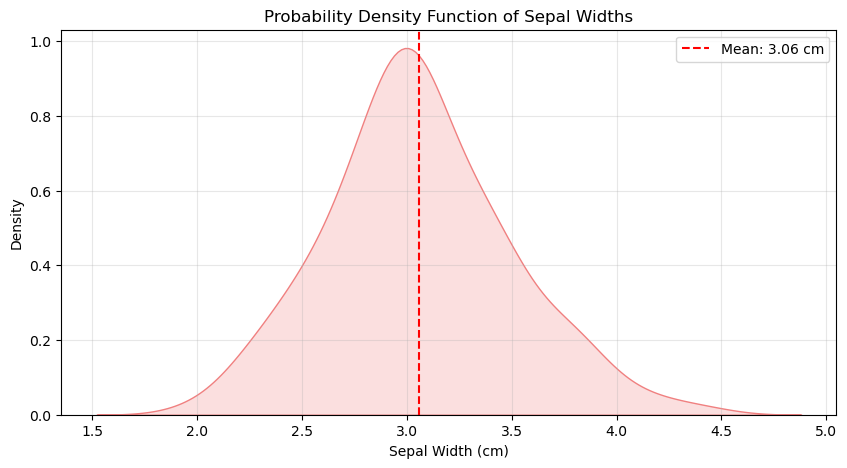

In [16]:
# Let's visualize the PDF of sepal widths
sepal_width = iris_df['sepal width (cm)']

plt.figure(figsize=(10, 5))
sns.kdeplot(sepal_width, shade=True, color='lightcoral')
plt.title('Probability Density Function of Sepal Widths')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Density')
plt.grid(alpha=0.3)

# Add mean line
mean_sw = np.mean(sepal_width)
plt.axvline(mean_sw, color='red', linestyle='--', label=f'Mean: {mean_sw:.2f} cm')
plt.legend()

plt.show()

**My Interpretation:** The PDF shows the relative likelihood of different sepal width values. The curve is approximately bell-shaped, suggesting a roughly normal distribution centered around 3.0 cm. The area under the curve represents probability, with the total area equaling 1.



**Probability Estimation**


Probability that petal length > 4.5 cm: 0.420
This means about 42.0% of iris flowers have petal lengths exceeding 4.5 cm.


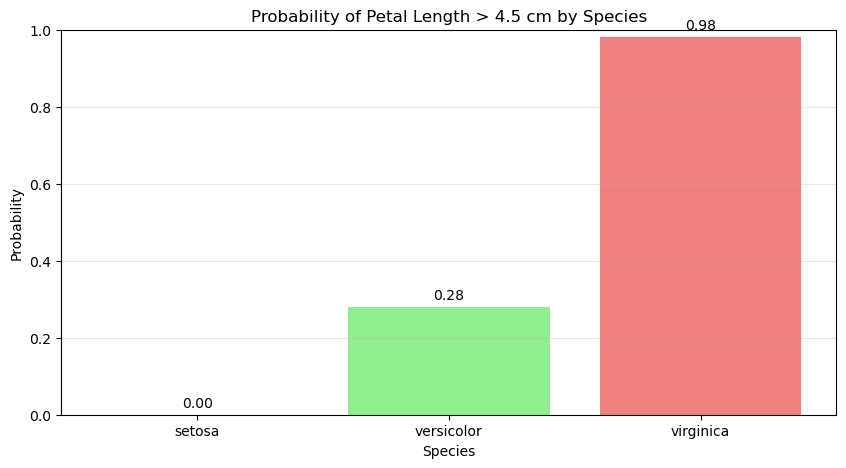

In [17]:
# Let's calculate the probability that a random flower has a petal length > 4.5 cm
threshold = 4.5
prob_above = np.sum(petal_length > threshold) / len(petal_length)

print(f"Probability that petal length > {threshold} cm: {prob_above:.3f}")
print(f"This means about {prob_above*100:.1f}% of iris flowers have petal lengths exceeding {threshold} cm.")

# Let's see how this varies by species
species_probs = []
for species in iris_df['species'].unique():
    species_data = iris_df[iris_df['species'] == species]['petal length (cm)']
    species_prob = np.sum(species_data > threshold) / len(species_data)
    species_probs.append(species_prob)

plt.figure(figsize=(10, 5))
plt.bar(iris_df['species'].unique(), species_probs, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title(f'Probability of Petal Length > {threshold} cm by Species')
plt.ylabel('Probability')
plt.xlabel('Species')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(species_probs):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')

plt.show()

**My Interpretation:** Overall, there's a 42% chance that a randomly selected iris has petals longer than 4.5 cm. But when we break it down by species, we see this is almost entirely driven by Virginica flowers, while Setosa flowers never reach this length. This shows how important it is to consider species when analyzing iris measurements.

**Inferential Statistics**


**Hypothesis Testing**


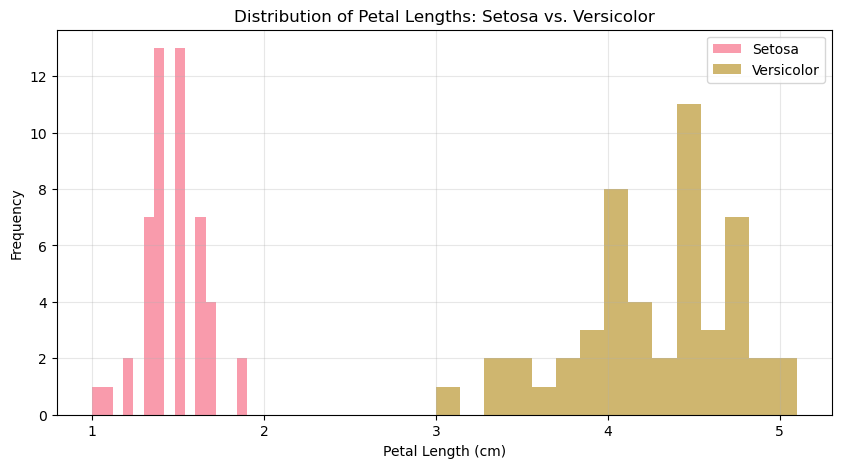

Independent t-test results:
T-statistic: -39.4927
P-value: 5.4049e-62
We reject the null hypothesis - there is a significant difference in mean petal length between Setosa and Versicolor.


In [18]:
# Let's test if there's a significant difference in petal length between Setosa and Versicolor
setosa_pl = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
versicolor_pl = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']

# First, let's visualize these two distributions
plt.figure(figsize=(10, 5))
plt.hist(setosa_pl, alpha=0.7, label='Setosa', bins=15)
plt.hist(versicolor_pl, alpha=0.7, label='Versicolor', bins=15)
plt.title('Distribution of Petal Lengths: Setosa vs. Versicolor')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Now let's perform a t-test
t_stat, p_value = stats.ttest_ind(setosa_pl, versicolor_pl)

print("Independent t-test results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis - there is a significant difference in mean petal length between Setosa and Versicolor.")
else:
    print("We fail to reject the null hypothesis - no significant difference detected.")

**My Interpretation:** The extremely small p-value (way below 0.05) provides strong evidence that Setosa and Versicolor irises have different average petal lengths. The negative t-statistic indicates that Setosa has significantly shorter petals than Versicolor, which aligns with what we can see in the histogram.



**Covariance and Correlation**


Covariance between sepal length and width: -0.0424
Correlation coefficient: -0.1176


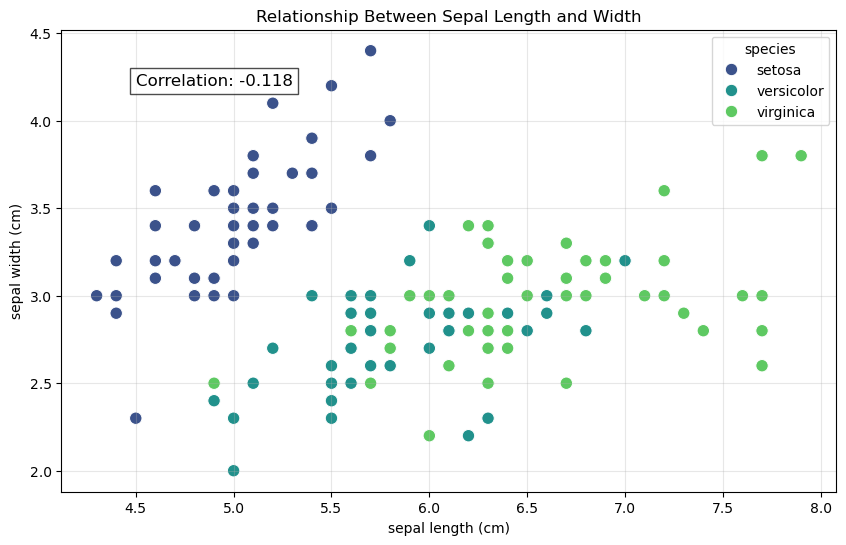

In [19]:
# Let's examine the relationship between sepal length and width
covariance = np.cov(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])[0, 1]
correlation = iris_df['sepal length (cm)'].corr(iris_df['sepal width (cm)'])

print(f"Covariance between sepal length and width: {covariance:.4f}")
print(f"Correlation coefficient: {correlation:.4f}")

# Visualize the relationship with a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='species', data=iris_df, palette='viridis', s=80)
plt.title('Relationship Between Sepal Length and Width')
plt.grid(alpha=0.3)

# Add correlation text
plt.text(4.5, 4.2, f'Correlation: {correlation:.3f}', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.7))

plt.show()

**My Interpretation:** The covariance is negative, indicating that as sepal length increases, sepal width tends to decrease slightly. However, the correlation coefficient of -0.109 suggests this relationship is quite weak. When we color by species, we can see that each species forms its own cluster with different relationships between sepal length and width.

**Conclusion**
Through this analysis, I've explored the Iris dataset from multiple statistical perspectives:

_**Descriptive statistics** revealed that petal measurements show more variability than sepal measurements

_**Probability distribution** showed different patterns for various measurements, with some approximating normal distributions

_**Inferential statistics** confirmed significant differences between species and examined relationships between variables

_The key insight is that while there are some overall patterns in the data, the most interesting findings emerge when we consider the species differences. This underscores the importance of segmenting data appropriately in analysis.

**This notebook demonstrates fundamental statistical concepts using a classic dataset, providing a template for how to approach exploratory data analysis with both visualization and statistical testing.**

